In [20]:
# !pip install ipyplot

In [1]:
import os
import pandas as pd
from IPython.display import HTML, display
import ipyplot

In [2]:
curretn_folder = os.getcwd()
dataset = os.path.abspath(os.path.join(curretn_folder,"..", "..","data","clean_Laion_400M"))

In [3]:
os.walk(dataset)

<generator object walk at 0x7063608576e0>

In [4]:
for dirname, _, filenames in os.walk(dataset):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

In [5]:
df = pd.read_parquet("/home/home/Desktop/research/data/Laion_400M/part-00001-5b54c5d5-bbcf-484d-a2ce-0d6f73df1a36-c000.snappy.parquet")

In [6]:
df

,SAMPLE_ID,URL,TEXT,HEIGHT,WIDTH,LICENSE,NSFW,similarity
0,3.754690e+12,https://photos6.spartoo.co.uk/photos/218/21855...,Shoes Men Derby Shoes Swear Jimmy 34 Marine,350.0,350.0,?,UNLIKELY,0.325293
1,2.438638e+12,https://upload.wikimedia.org/wikipedia/commons...,IS-Relationships-Chart,512.0,373.0,?,UNSURE,0.304894
2,3.325701e+12,http://i.ytimg.com/vi/PcboCDaJlu0/mqdefault.jpg,House Relax 2019 (New & Best Deep House Music ...,320.0,180.0,?,UNLIKELY,0.329725
3,2.021529e+12,http://ladyenslain.net/festivals/2011/07.22-24...,Morbid Angel @ Tuska Open Air,424.0,640.0,?,NSFW,0.302828
4,4.264074e+12,https://stp.sgp1.digitaloceanspaces.com/storag...,Saloni Vol-8 (12 Pcs Catalog),247.0,296.0,?,UNLIKELY,0.300020
...,...,...,...,...,...,...,...,...
12933514,2.263458e+12,https://cdn.images.express.co.uk/img/dynamic/1...,Brigitte Macron diet - what does Emmanuel Macr...,750.0,445.0,?,UNSURE,0.396277
12933515,4.048350e+12,https://i.pinimg.com/236x/84/a5/1e/84a51e6114a...,Bear // Graphite Art Print,236.0,166.0,?,UNLIKELY,0.345441
12933516,4.207729e+12,https://www.originalsoundversion.com/wp-conten...,INTERVIEW: Composer David Fenn on the Titan So...,550.0,376.0,?,UNLIKELY,0.332903
12933517,5.885880e+11,http://ih0.redbubble.net/image.16494844.0702/f...,Not All Those Who Wander Are Lost by Corinna D...,220.0,200.0,?,UNLIKELY,0.329981


In [7]:


# Inject CSS for black background
display(HTML("<style> body { background-color: black !important; color: white; } </style>"))

# Your code
N = 100
small = df.sample(n=N)
images_array = small["URL"].iloc[0:N].values
texts_array = small["TEXT"].iloc[0:N].values

ipyplot.plot_images(images_array, texts_array, max_images=N, img_width=200)


In [ ]:
import pyarrow.dataset as ds

# Create a dataset from all parquet shards
dataset = ds.dataset("/home/home/Desktop/research/data/clean_Laion_400M/", format="parquet")

# Inspect schema
print(dataset.schema)

# Take first 5 rows
table = dataset.take([0, 1, 2, 3, 4])
print(table.to_pandas())

# Apply filter (only metadata is read first)
scanner = dataset.to_table(filter=(ds.field("similarity") > 0.6))
df = scanner.to_pandas()
print(df.head())

SAMPLE_ID: int64
URL: string
TEXT: string
HEIGHT: int32
WIDTH: int32
LICENSE: string
NSFW: string
similarity: double
-- schema metadata --
org.apache.spark.version: '3.1.2'
org.apache.spark.sql.parquet.row.metadata: '{"type":"struct","fields":[{"' + 511
       SAMPLE_ID                                                URL  \
0  1581282014547  http://media.rightmove.co.uk/148k/147518/58718...   
1  1060015003169  https://thumbs.ebaystatic.com/images/g/DYEAAOS...   
2  3372497001913  https://farm1.staticflickr.com/784/40182677504...   
3   382020002775  https://t2.ftcdn.net/jpg/00/58/35/35/240_F_583...   
4  2928456001411  https://findingblanche.files.wordpress.com/201...   

                                                TEXT  HEIGHT  WIDTH LICENSE  \
0            View EPC Rating Graph for this property     109    100       ?   
1  Silverline Air Framing Nailer 90mm 10 - 12 Gau...     225    225       ?   
2                                    Anhui Mountains     800    514       ?   
3  

In [10]:
dataset.schema

SAMPLE_ID: int64
URL: string
TEXT: string
HEIGHT: int32
WIDTH: int32
LICENSE: string
NSFW: string
similarity: double
-- schema metadata --
org.apache.spark.version: '3.1.2'
org.apache.spark.sql.parquet.row.metadata: '{"type":"struct","fields":[{"' + 511

In [4]:
for fragment in dataset.get_fragments():
    print(fragment.path)


/home/home/Desktop/research/data/Laion_400M/part-00000-5b54c5d5-bbcf-484d-a2ce-0d6f73df1a36-c000.snappy.parquet
/home/home/Desktop/research/data/Laion_400M/part-00001-5b54c5d5-bbcf-484d-a2ce-0d6f73df1a36-c000.snappy.parquet
/home/home/Desktop/research/data/Laion_400M/part-00002-5b54c5d5-bbcf-484d-a2ce-0d6f73df1a36-c000.snappy.parquet
/home/home/Desktop/research/data/Laion_400M/part-00003-5b54c5d5-bbcf-484d-a2ce-0d6f73df1a36-c000.snappy.parquet
/home/home/Desktop/research/data/Laion_400M/part-00004-5b54c5d5-bbcf-484d-a2ce-0d6f73df1a36-c000.snappy.parquet
/home/home/Desktop/research/data/Laion_400M/part-00005-5b54c5d5-bbcf-484d-a2ce-0d6f73df1a36-c000.snappy.parquet
/home/home/Desktop/research/data/Laion_400M/part-00006-5b54c5d5-bbcf-484d-a2ce-0d6f73df1a36-c000.snappy.parquet
/home/home/Desktop/research/data/Laion_400M/part-00007-5b54c5d5-bbcf-484d-a2ce-0d6f73df1a36-c000.snappy.parquet
/home/home/Desktop/research/data/Laion_400M/part-00008-5b54c5d5-bbcf-484d-a2ce-0d6f73df1a36-c000.snappy.

In [32]:
import pandas as pd
import requests
from tqdm import tqdm

def filter_valid_images(parquet_file, output_file, percentage: float = 1.0, timeout=5):
    """
    Filter valid images from a LAION parquet file by checking if URL is alive.

    Args:
        parquet_file (str): input parquet file
        output_file (str): output parquet file for valid entries
        percentage (float): fraction of rows to check (0 < percentage <= 1.0)
        timeout (int): request timeout in seconds
    """
    # Load required columns
    df = pd.read_parquet(parquet_file, columns=["SAMPLE_ID", "URL", "TEXT", "HEIGHT", "WIDTH"])
    
    # Sample a percentage of rows
    if percentage < 1.0:
        df = df.sample(frac=percentage, random_state=42).reset_index(drop=True)

    valid_rows = []
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        url = row["URL"]
        try:
            r = requests.head(url, timeout=timeout)  # HEAD is faster than GET
            if r.status_code == 200:
                valid_rows.append(row)
        except Exception:
            continue
    
    # Save only valid rows
    cleaned = pd.DataFrame(valid_rows)
    cleaned.to_parquet(output_file, index=False)
    print(f"Saved {len(cleaned)} valid entries to {output_file}")
    return cleaned

In [33]:
curretn_folder = os.getcwd()
dataset = os.path.abspath(os.path.join(curretn_folder,"..", "..","data","Laion_400M"))
clean_path = os.path.abspath(os.path.join(curretn_folder,"..", "..","data","clean_Laion_400M"))

In [27]:
clean_path

'/home/home/Desktop/research/data/clean_Laion_400M'

## COCO DATASET

In [1]:
import os
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import requests
from PIL import Image

curretn_folder = os.getcwd()
dataset = os.path.abspath(os.path.join(curretn_folder,"..", "..","data","COCO", "annotations_trainval2017", "annotations"))
dataset_img = os.path.abspath(os.path.join(curretn_folder,"..", "..","data","COCO", "train2017"))

annFile = os.path.join(dataset, "captions_train2017.json")

In [2]:

# Initialize COCO api
coco_caps = COCO(annFile)

# Get all image ids
imgIds = coco_caps.getImgIds()
print(f"Total images: {len(imgIds)}")

# Pick one image
img_id = imgIds[0]
img_info = coco_caps.loadImgs(img_id)[0]

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!
Total images: 118287


In [3]:
coco_caps.loadImgs(img_id)[0]

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [4]:
annIds = coco_caps.getAnnIds(imgIds=img_info['id'])
anns = coco_caps.loadAnns(annIds)

In [5]:
anns

[{'image_id': 391895,
  'id': 770337,
  'caption': 'A man with a red helmet on a small moped on a dirt road. '},
 {'image_id': 391895,
  'id': 771687,
  'caption': 'Man riding a motor bike on a dirt road on the countryside.'},
 {'image_id': 391895,
  'id': 772707,
  'caption': 'A man riding on the back of a motorcycle.'},
 {'image_id': 391895,
  'id': 776154,
  'caption': 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. '},
 {'image_id': 391895,
  'id': 781998,
  'caption': 'A man in a red shirt and a red hat is on a motorcycle on a hill side.'}]

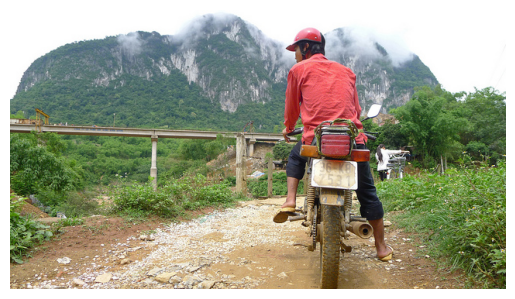

In [6]:
dataLoad = os.path.join(dataset_img, img_info['file_name'])
image = Image.open(dataLoad)
plt.imshow(image)
plt.axis('off')
plt.show()
    

In [7]:
from tqdm import tqdm
import json

def create_dataset_from_COCC(
        annotations_path:str, 
        images_path:str,
        output_dir:str = None, 
        prefix:str="train"
        ):
    
        # Initialize COCO api
        coco_caps = COCO(annotations_path)

        # Get all image ids
        imgIds = coco_caps.getImgIds()
        print(f"Total images: {len(imgIds)}")
        
        data = []
        pbar = tqdm(imgIds)

        for img_id in pbar:
            img_info = coco_caps.loadImgs(img_id)[0]
            img_name = img_info["file_name"]

            annIds = coco_caps.getAnnIds(imgIds=img_info['id'])
            anns = coco_caps.loadAnns(annIds)
            pbar1 = tqdm(anns)

            for annotation in pbar1:
                info = {
                    'id':annotation['id'],
                    "image_id":annotation["image_id"],
                    'image_name':img_name,
                    'caption': annotation['caption']
                }
                
                data.append(info)

            print(data)
            break

    
    


In [8]:
create_dataset_from_COCC(annFile, dataset_img)
       


loading annotations into memory...
Done (t=0.51s)
creating index...
index created!
Total images: 118287


  0%|          | 0/118287 [00:00<?, ?it/s]

[{'id': 770337, 'image_id': 391895, 'image_name': '000000391895.jpg', 'caption': 'A man with a red helmet on a small moped on a dirt road. '}, {'id': 771687, 'image_id': 391895, 'image_name': '000000391895.jpg', 'caption': 'Man riding a motor bike on a dirt road on the countryside.'}, {'id': 772707, 'image_id': 391895, 'image_name': '000000391895.jpg', 'caption': 'A man riding on the back of a motorcycle.'}, {'id': 776154, 'image_id': 391895, 'image_name': '000000391895.jpg', 'caption': 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. '}, {'id': 781998, 'image_id': 391895, 'image_name': '000000391895.jpg', 'caption': 'A man in a red shirt and a red hat is on a motorcycle on a hill side.'}]


In [ ]:
from pycocotools.coco import COCO
from tqdm import tqdm
import pandas as pd

def create_dataset_from_COCO(
        annotations_path: str, 
        images_path: str,
        output_dir: str = None, 
        prefix: str = "train"
    ):
    # Initialize COCO captions API
    coco_caps = COCO(annotations_path)

    # Get all image ids
    imgIds = coco_caps.getImgIds()
    print(f"Total images: {len(imgIds)}")
    
    data = []

    for img_id in tqdm(imgIds, desc="Processing images"):
        img_info = coco_caps.loadImgs(img_id)[0]
        img_name = img_info["file_name"]

        annIds = coco_caps.getAnnIds(imgIds=img_info['id'])
        anns = coco_caps.loadAnns(annIds)

        for annotation in anns:
            info = {
                "ann_id": annotation["id"],
                "image_id": annotation["image_id"],
                "image_name": img_name,
                "caption": annotation["caption"]
            }
            data.append(info)

    # Convert to pandas DataFrame
    df = pd.DataFrame(data)
    print(f"Total rows: {len(df)}")

    # Save if output_dir is provided
    if output_dir:
        out_file = f"{output_dir}/coco_{prefix}_captions.csv"
        df.to_csv(out_file, index=False)
        print(f"Saved dataset to {out_file}")

    return df

In [ ]:
import os
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import requests
from PIL import Image

curretn_folder = os.getcwd()
dataset_base = os.path.abspath(os.path.join(curretn_folder,"..", "..","data","COCO"))

file_train = os.path.join(dataset_base,"joint","coco_train_captions.csv")
file_test = os.path.join(dataset_base,"joint","coco_test_captions.csv")
images_train = os.path.join(dataset_base, "train2017")
images_test = os.path.join(dataset_base, "test2017")


'/home/home/Desktop/research/data/COCO'

In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from models.models import RestrictionMap

In [8]:
d_i_j = 50
latent_dim = 5
P12 = RestrictionMap(dij=latent_dim, di_dj=d_i_j, requires_grad=False)
P21 = RestrictionMap(dij=latent_dim, di_dj=d_i_j - 10, requires_grad=False)

theta1 =  torch.rand(d_i_j, 1)
theta2 =  torch.rand(d_i_j - 10, 1)


In [9]:
P12.Pij.weight.shape

torch.Size([5, 50])

In [10]:
theta1.shape

torch.Size([50, 1])

In [11]:
P12.Pij.weight @ theta1 - P21.Pij.weight @ theta2

tensor([[ 0.5716],
        [-0.0071],
        [ 0.0428],
        [-0.0658],
        [-0.4055]])

In [12]:
P12.Pij.weight.T @ (P12.Pij.weight @ theta1 - P21.Pij.weight @ theta2)

tensor([[-0.0200],
        [ 0.0398],
        [-0.0358],
        [-0.0172],
        [-0.0215],
        [ 0.0733],
        [ 0.0320],
        [ 0.0710],
        [-0.0056],
        [-0.0574],
        [ 0.0115],
        [ 0.0814],
        [-0.0546],
        [ 0.0445],
        [ 0.0424],
        [-0.0101],
        [ 0.0323],
        [-0.0177],
        [-0.0254],
        [ 0.0114],
        [-0.0201],
        [-0.0376],
        [ 0.0413],
        [-0.0028],
        [ 0.0056],
        [-0.0239],
        [ 0.0020],
        [-0.0387],
        [ 0.0153],
        [ 0.0712],
        [ 0.0444],
        [-0.0203],
        [ 0.0758],
        [-0.0085],
        [ 0.0269],
        [-0.0005],
        [ 0.0053],
        [ 0.0084],
        [ 0.0525],
        [-0.0454],
        [ 0.0482],
        [ 0.0072],
        [ 0.0197],
        [ 0.0772],
        [-0.0645],
        [-0.0548],
        [-0.0054],
        [ 0.0032],
        [-0.0008],
        [ 0.0583]])

In [13]:
(P12.Pij.weight @ theta1 - P21.Pij.weight @ theta2) @ theta1.T

tensor([[ 4.4328e-01,  2.0996e-01,  2.0088e-01,  9.8350e-02,  8.6809e-03,
          3.8744e-01,  4.1534e-01,  2.3945e-01,  2.9126e-01,  2.8890e-01,
          1.3764e-01,  5.2035e-01,  1.6392e-01,  3.0942e-01,  5.6585e-01,
          5.0621e-01,  5.1936e-01,  4.7587e-01,  2.3605e-01,  1.6219e-01,
          1.2446e-01,  1.2719e-02,  1.0405e-01,  3.4067e-01,  3.1565e-02,
          5.1874e-01,  3.3888e-01,  1.7816e-01,  7.7885e-02,  1.4454e-01,
          3.5467e-01,  4.9765e-01,  5.6978e-01,  1.2425e-02,  4.2151e-01,
          5.6334e-01,  1.9355e-01,  3.4558e-01,  1.4138e-02,  1.2667e-01,
          5.5041e-01,  2.5784e-01,  5.0284e-01,  1.9770e-01,  2.3482e-01,
          9.9173e-02,  3.4441e-01,  1.4172e-01,  4.2074e-02,  4.1645e-01],
        [-5.4704e-03, -2.5910e-03, -2.4790e-03, -1.2137e-03, -1.0713e-04,
         -4.7813e-03, -5.1256e-03, -2.9550e-03, -3.5943e-03, -3.5652e-03,
         -1.6986e-03, -6.4215e-03, -2.0228e-03, -3.8185e-03, -6.9829e-03,
         -6.2470e-03, -6.4093e-03, -5